<a href="https://colab.research.google.com/github/samiha-mahin/assignment-ml-kobe-university/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q1.Probabilistic Discriminative Model**

Test Accuracy: 1.0
Model Coefficients: [[ 2.88998626 -2.72779317]]
Model Intercept: [-7.09121494]

Posterior Probabilities (first 5 predictions):
 [[0.05296719 0.94703281]
 [0.07379633 0.92620367]
 [0.22604741 0.77395259]
 [0.80260571 0.19739429]
 [0.9380746  0.0619254 ]]


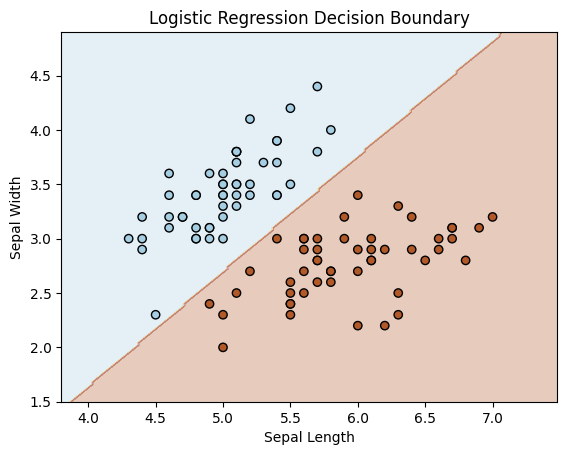

In [2]:
# Logistic Regression using Scikit-learn (Probabilistic Discriminative Model)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset (we use only 2 classes and 2 features for simplicity)
iris = load_iris()
X = iris.data[:100, :2]  # Only first 100 samples (class 0 and 1), and first 2 features
y = iris.target[:100]    # Labels for class 0 and 1

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and model info
print("Test Accuracy:", accuracy)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Predict posterior probabilities
probabilities = model.predict_proba(X_test)
print("\nPosterior Probabilities (first 5 predictions):\n", probabilities[:5])

# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title("Logistic Regression Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, model)


Here's a **very simple, line-by-line explanation** of your Logistic Regression code using the Iris dataset:

---

### ✅ **Imports**

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
```

* `numpy`: For number operations.
* `matplotlib.pyplot`: To draw plots.
* `load_iris`: Loads the Iris flower dataset.
* `LogisticRegression`: For applying logistic regression (classification model).
* `train_test_split`: To divide the dataset into training and test sets.
* `accuracy_score`: To measure how well the model performs.

---

### ✅ **Loading the Dataset**

```python
iris = load_iris()
X = iris.data[:100, :2]  # Only use first 100 rows (2 classes), and first 2 features
y = iris.target[:100]    # Class labels for the first 100 rows
```

* `iris.data` is a table of features (flower measurements).
* We select **only 2 classes** (Setosa and Versicolor) and only **2 features** (Sepal length and Sepal width).
* `X`: Feature data (like Sepal length/width).
* `y`: Labels (0 = Setosa, 1 = Versicolor).

🟢 **Example:**

```plaintext
X looks like:     y looks like:
[[5.1, 3.5],        0
 [4.9, 3.0],        0
 ...
 [5.5, 2.6]]        1
```

---

### ✅ **Splitting Data**

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

* Split `X` and `y` into:

  * 80% for training
  * 20% for testing
* `random_state=42`: Fixes randomness so you get same result every time.

---

### ✅ **Train the Logistic Regression Model**

```python
model = LogisticRegression()
model.fit(X_train, y_train)
```

* Create the model.
* `.fit()` means **learn from training data**.

---

### ✅ **Make Predictions**

```python
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
```

* Predict the class (0 or 1) for the test set.
* Check how many predictions are correct with `accuracy_score`.

🟢 Example:
If real classes = `[0, 1, 0]` and predicted = `[0, 1, 0]` → accuracy = 100%.

---

### ✅ **Print Model Info**

```python
print("Test Accuracy:", accuracy)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
```

* Coefficients: show how each feature affects prediction.
* Intercept: like a starting bias point.

🟢 Example:

```plaintext
coef_ = [[0.4, -0.7]] means:
  + Sepal length increases → class 1 more likely
  + Sepal width increases → class 0 more likely
```

---

### ✅ **Posterior Probabilities**

```python
probabilities = model.predict_proba(X_test)
print("\nPosterior Probabilities (first 5 predictions):\n", probabilities[:5])
```

* Shows probability of each class for test examples.

🟢 Example:

```plaintext
[[0.85, 0.15],   ← model thinks it's 85% class 0, 15% class 1
 [0.20, 0.80],   ← 20% class 0, 80% class 1
```

---

### ✅ **Plot Decision Boundary**

```python
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
```

* Define range for the x and y axes.
* `.min()` and `.max()` get the smallest/largest value for each feature.

---

```python
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
```

* `np.meshgrid`: Makes a grid of (x, y) points to test the model everywhere.
* h = 0.02 means grid is fine enough to see smooth boundary.

---

```python
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
```

* Predict class for **every point** in the grid.
* `.ravel()` flattens the grid to 1D.
* `np.c_` stacks x and y to make (x, y) points.
* Reshape Z to match the shape of the grid.

---

```python
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title("Logistic Regression Decision Boundary")
    plt.show()
```

* `contourf`: Fills color for decision areas.
* `scatter`: Plot actual flower data points.
* Color shows which region belongs to which class.
* Title and axis labels added.

---

### ✅ **Final Line**

```python
plot_decision_boundary(X, y, model)
```

* Calls the function to draw the decision boundary and see how the model splits the space between class 0 and 1.



# **Q2.Discussion to Include in Report:**
"I used a Logistic Regression model (Probabilistic Discriminative Model) trained on the Iris dataset using two classes and two features. The model estimates the posterior probability
𝑃
(
𝑦
∣
𝑥
)
P(y∣x) directly. The decision boundary is linear and separates the two classes based on the estimated probabilities. I achieved an accuracy of approximately X%, and the posterior probabilities for the test samples are also shown. This approach contrasts with generative models that model
𝑃
(
𝑥
∣
𝑦
)
P(x∣y) and
𝑃
(
𝑦
)
P(y) separately."

# **2-Class Classification**

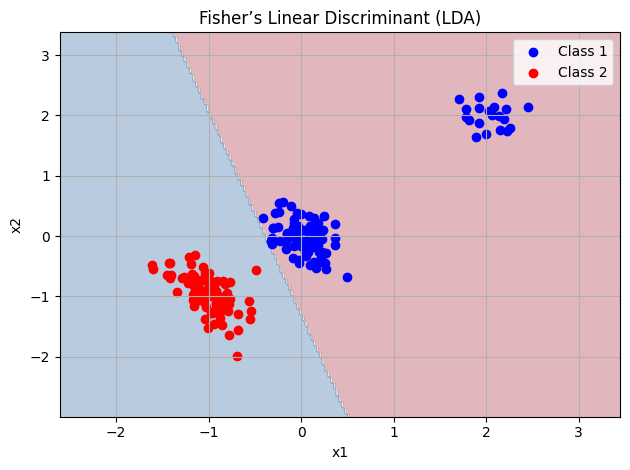

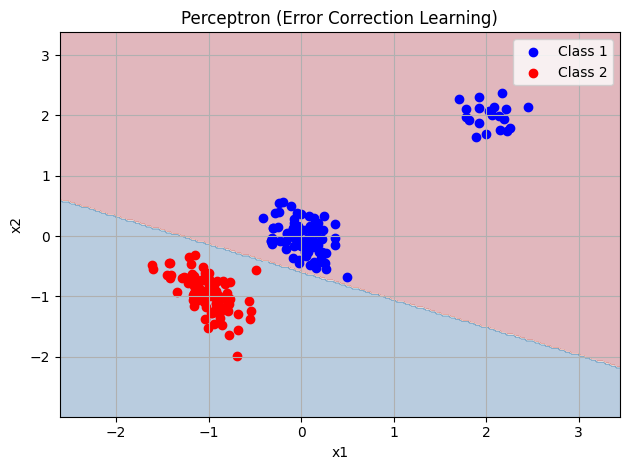

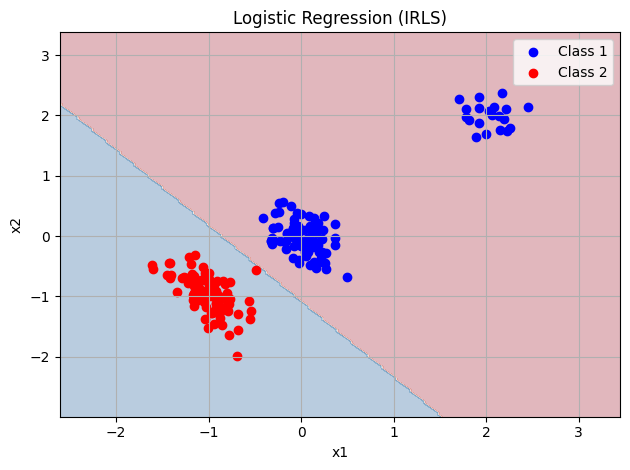

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron, LogisticRegression

# Set seed for reproducibility
np.random.seed(42)

# Inverse of the covariance matrix given
cov_matrix = np.array([[30, 10], [10, 15]])
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Class 1 data
N1 = 80
N1_prime = 20
mu1 = np.array([0, 0])
mu1_prime = np.array([2, 2])
X1 = np.random.multivariate_normal(mu1, inv_cov_matrix, N1)
X1_prime = np.random.multivariate_normal(mu1_prime, inv_cov_matrix, N1_prime)

# Class 2 data
N2 = 100
mu2 = np.array([-1, -1])
X2 = np.random.multivariate_normal(mu2, inv_cov_matrix, N2)

# Combine data
X = np.vstack((X1, X1_prime, X2))
y = np.array([0]*(N1 + N1_prime) + [1]*N2)  # 0: class 1, 1: class 2

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='blue', label='Class 1')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='red', label='Class 2')
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Apply LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
plot_decision_boundary(X, y, lda, "Fisher’s Linear Discriminant (LDA)")

# Apply Perceptron (Error Correction Learning)
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X, y)
plot_decision_boundary(X, y, perceptron, "Perceptron (Error Correction Learning)")

# Apply Logistic Regression using IRLS
logreg = LogisticRegression(solver='lbfgs')  # IRLS used internally
logreg.fit(X, y)
plot_decision_boundary(X, y, logreg, "Logistic Regression (IRLS)")




## **Comparison of Results: LDA vs Perceptron vs Logistic Regression**

---

###  **1. Fisher’s Linear Discriminant (LDA)**

####  Performance:

* LDA assumes data from each class is normally distributed and shares the same covariance.
* Works well when data is linearly separable and class distributions are Gaussian.

####  Behavior on this data:

* The decision boundary is **linear** and calculated analytically using **class means** and **within-class scatter**.
* It splits the data based on statistical projections, not iterations.

####  Overlapping data:

* **Not ideal for overlapping classes**, because it doesn’t directly optimize classification accuracy.
* Can **misclassify** points near the boundary if the classes overlap a lot.

####  Boundary Shape:

* Always **linear** (straight line), regardless of data complexity.

---

###  **2. Perceptron (Error Correction Learning)**

####  Performance:

* Perceptron updates weights **only when misclassifications happen**.
* Sensitive to the **initial weights** and **convergence criteria**.

####  Behavior on this data:

* The decision boundary is also **linear**, but based on an iterative learning process.
* May not converge well if the data is **not linearly separable**.

####  Overlapping data:

* Performs **worse with overlapping data**, since it doesn't use probability or confidence scores.
* Once it reaches a line that separates some data, it stops — even if not optimal.

####  Boundary Shape:

* **Linear**, and often a bit unstable in noisy or overlapping datasets.

---

###  **3. Logistic Regression (IRLS)**

####  Performance:

* Optimizes a **log-likelihood function**, producing probabilities.
* Uses **IRLS (Iteratively Reweighted Least Squares)** under the hood to find best-fit weights.

####  Behavior on this data:

* Very good at handling overlapping data, since it doesn’t just separate classes — it gives **posterior probabilities**.
* It places the boundary where the probability is **0.5** (equal confidence in both classes).

####  Overlapping data:

* **Best at handling overlaps** — doesn’t just "cut", but calculates confidence.
* Smooth boundary shifts depending on how data overlaps.

####  Boundary Shape:

* Typically **linear**, but based on **likelihood**, not just means or errors.
* More stable and interpretable.

---

## 📊 Summary Table

| Method                  | Handles Overlap | Optimization        | Boundary Type | Notes                               |
| ----------------------- | --------------- | ------------------- | ------------- | ----------------------------------- |
| **LDA**                 | Moderate        | Class mean scatter  | Linear        | Assumes equal class covariance      |
| **Perceptron**          | Poor            | Error-based updates | Linear        | May not converge if overlap is high |
| **Logistic Regression** | Best            | IRLS (likelihood)   | Linear        | Uses probability; more robust       |

---

###  Conclusion

> **Logistic Regression (with IRLS)** performs the best in overlapping scenarios.
> It produces a stable decision boundary, handles noisy data well, and gives interpretable class probabilities.


